In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('/content/drive/MyDrive/Data/Coffee Shop Sales.xlsx')
df.head().T

,0,1,2,3,4
transaction_id,1,2,3,4,5
transaction_date,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00
transaction_time,07:06:11,07:08:56,07:14:04,07:20:24,07:22:41
transaction_qty,2,2,2,1,2
store_id,5,5,5,5,5
store_location,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan
product_id,32,57,59,22,57
unit_price,3.0,3.1,4.5,2.0,3.1
product_category,Coffee,Tea,Drinking Chocolate,Coffee,Tea
product_type,Gourmet brewed coffee,Brewed Chai tea,Hot chocolate,Drip coffee,Brewed Chai tea


In [13]:
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Noticed:
1. transaction_time  -> currently object -> need in time
2. no column for sales -> create one by -> transaction_qty * unit_price

In [15]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [17]:
df['sales'] = df['transaction_qty'] * df['unit_price']
df['datetime'] = df['transaction_date'] + df['transaction_time']
df.head().T

,0,1,2,3,4
transaction_id,1,2,3,4,5
transaction_date,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00
transaction_time,0 days 07:06:11,0 days 07:08:56,0 days 07:14:04,0 days 07:20:24,0 days 07:22:41
transaction_qty,2,2,2,1,2
store_id,5,5,5,5,5
store_location,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan,Lower Manhattan
product_id,32,57,59,22,57
unit_price,3.0,3.1,4.5,2.0,3.1
product_category,Coffee,Tea,Drinking Chocolate,Coffee,Tea
product_type,Gourmet brewed coffee,Brewed Chai tea,Hot chocolate,Drip coffee,Brewed Chai tea


In [18]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [19]:
distinct_features = {
    'store_location': df['store_location'].unique(),
    'unit_price': df['unit_price'].unique(),
    'product_category': df['product_category'].unique()
}
distinct_features

{'store_location': array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object),
 'unit_price': array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
         4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
         6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
        14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
         4.69, 45.  , 23.  ,  2.1 ,  2.65]),
 'product_category': array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
        'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
       dtype=object)}

---
Store wise sales

In [20]:
df_location = df.groupby('store_location').agg({
    'sales': 'sum',
    'transaction_id': 'count'
})
df_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [21]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['sales'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


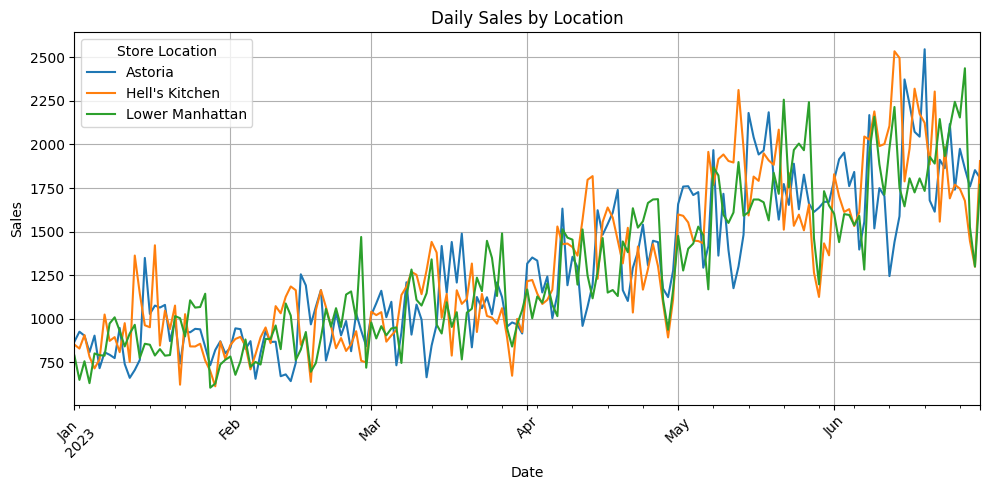

In [22]:
daily_sales_by_location.plot(figsize=(10, 5), title = 'Daily Sales by Location')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Store Location')
plt.show()

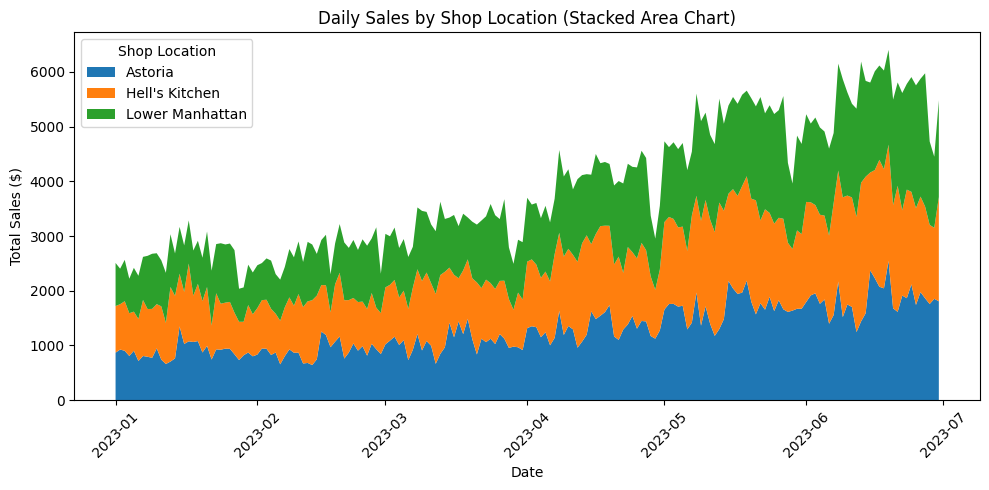

In [23]:
plt.figure(figsize=(10, 5))

plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns)

plt.title('Daily Sales by Shop Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
# plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Shop Location')
plt.show()

In [24]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

#---------weekly sales-------------
df['day_of_week'] = df['datetime'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['sales'].sum()
weekly_sales = weekly_sales.reindex(days_order).reset_index()
#----------------------------------

#---------monthly sales-------------
df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
#----------------------------------


print(daily_sales)
print(weekly_sales, "\n\n",monthly_sales)

    transaction_date    sales
0         2023-01-01  2508.20
1         2023-01-02  2403.35
2         2023-01-03  2565.00
3         2023-01-04  2220.10
4         2023-01-05  2418.85
..               ...      ...
176       2023-06-26  5875.90
177       2023-06-27  5975.65
178       2023-06-28  4728.90
179       2023-06-29  4450.75
180       2023-06-30  5481.32

[181 rows x 2 columns]
  day_of_week      sales
0      Monday  101677.28
1     Tuesday   99455.94
2   Wednesday  100313.54
3    Thursday  100767.78
4      Friday  101373.00
5    Saturday   96894.48
6      Sunday   98330.31 

      month      sales
0  2023-01   81677.74
1  2023-02   76145.19
2  2023-03   98834.68
3  2023-04  118941.08
4  2023-05  156727.76
5  2023-06  166485.88


---
1. Daily sales is high in June
2. Monday most sales - Less sales on weekends
3. least in Feb 2023, Most in June 2023

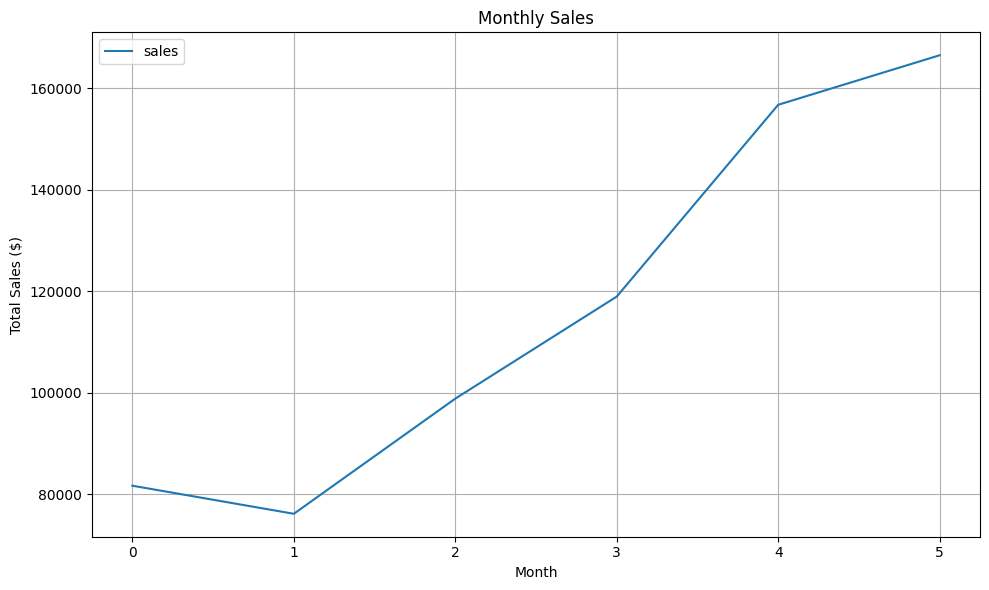

In [25]:
monthly_sales.plot(figsize=(10,6), title='Monthly Sales')

plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

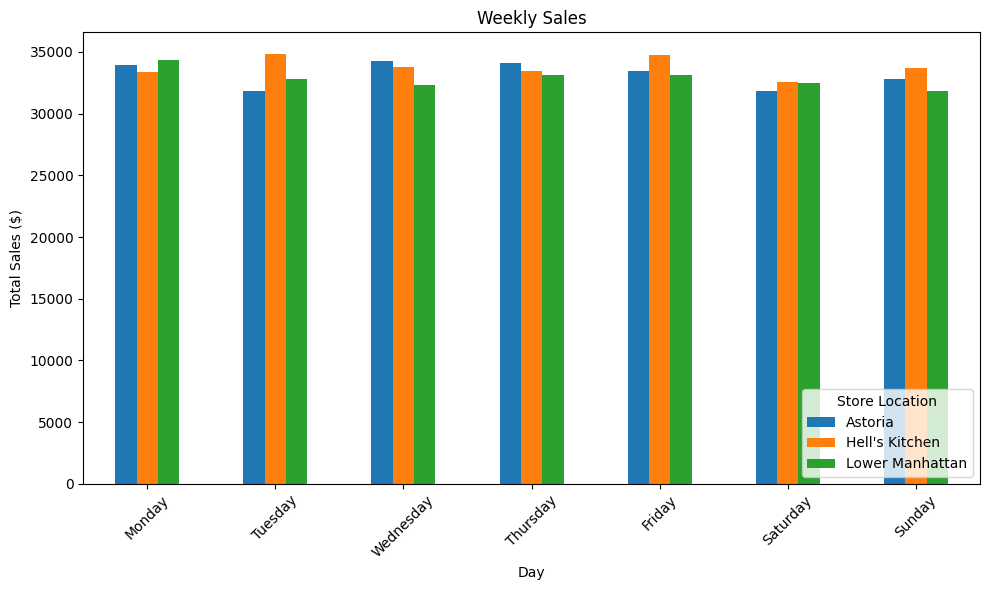

In [26]:
weekly_sales = df.groupby(['day_of_week', 'store_location'])['sales'].sum().unstack()
weekly_sales = weekly_sales.reindex(days_order)

weekly_sales.plot(kind='bar', figsize=(10, 6), title='Weekly Sales')
plt.xlabel('Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Store Location', loc='lower right')
plt.tight_layout()
plt.show()

In [27]:
df_category = df.groupby('product_category').agg({
    'sales': 'sum',
    'transaction_id': 'count'
}).sort_values('sales', ascending = False)
df_category
# df_category.index.tolist()

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


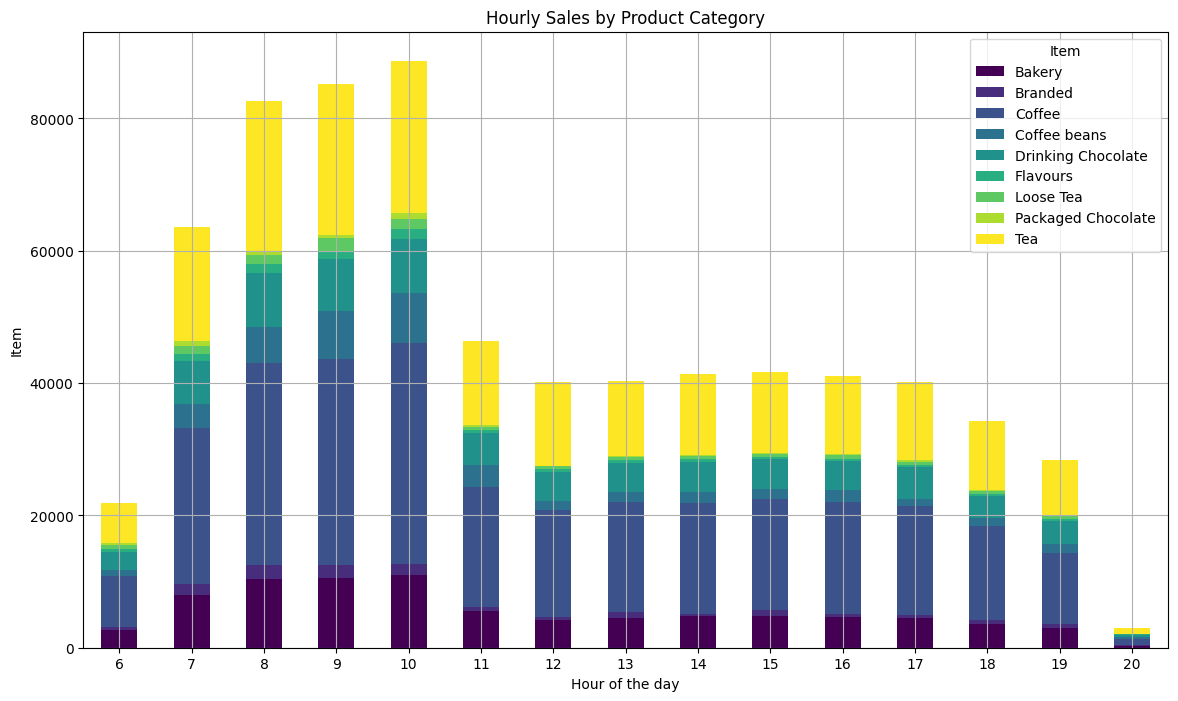

In [28]:
# Hourly sales x Product category
df['hour'] = df['datetime'].dt.hour
hourly_sales_by_product_category = df.groupby(['hour', 'product_category'])['sales'].sum().unstack()

hourly_sales_by_product_category.plot(figsize=(14,8), kind='bar', stacked='True', colormap='viridis')
plt.title('Hourly Sales by Product Category')
plt.xlabel('Hour of the day')
plt.ylabel('Item')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Item')
plt.show()

In [32]:
# create average column
df_category['avg_sales'] = (df_category['sales'] / df_category['transaction_id']).round(2)
# sort by highest average sales first
df_category.sort_values('avg_sales', ascending = False)

,sales,transaction_id,avg_sales
product_category,,,
Coffee beans,40085.25,1753,22.87
Branded,13607.00,747,18.22
Loose Tea,11213.60,1210,9.27
Packaged Chocolate,4407.64,487,9.05
Drinking Chocolate,72416.00,11468,6.31
Coffee,269952.45,58416,4.62
Tea,196405.95,45449,4.32
Bakery,82315.64,22796,3.61
Flavours,8408.80,6790,1.24


In [33]:
df_category.describe()

,sales,transaction_id,avg_sales
count,9.000000,9.000000,9.000000
mean,77645.814444,16568.444444,8.834444
std,94351.450270,21534.941149,7.200752
min,4407.640000,487.000000,1.240000
25%,11213.600000,1210.000000,4.320000
50%,40085.250000,6790.000000,6.310000
75%,82315.640000,22796.000000,9.270000
max,269952.450000,58416.000000,22.870000


In [36]:
sales_by_product_type = df.groupby('product_type').agg({
    'sales': 'sum',
    'unit_price': 'mean'
}).sort_values('sales', ascending = False)

sales_by_product_type

,sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


In [37]:
product_sales_df = df.groupby(['product_category', 'product_type'])['sales']
product_sales_df = product_sales_df.sum().reset_index()
product_sales_df

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


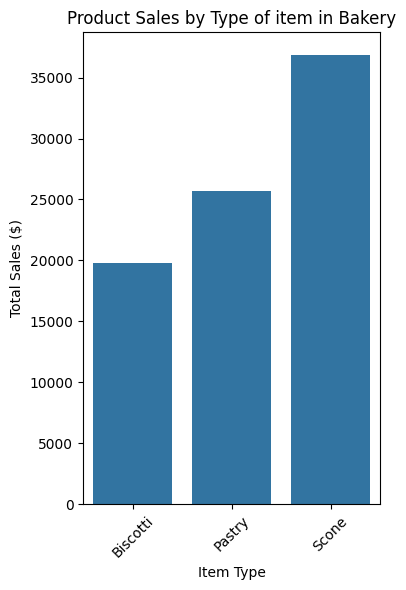

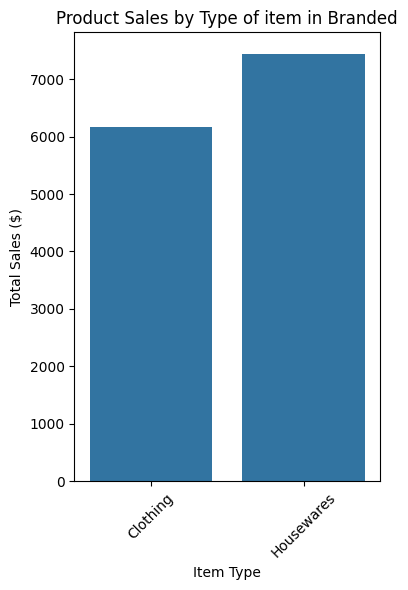

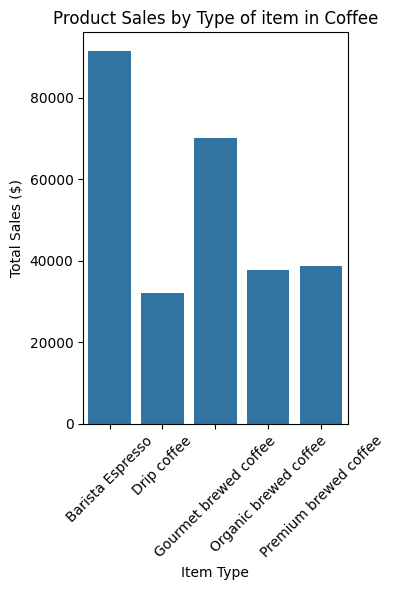

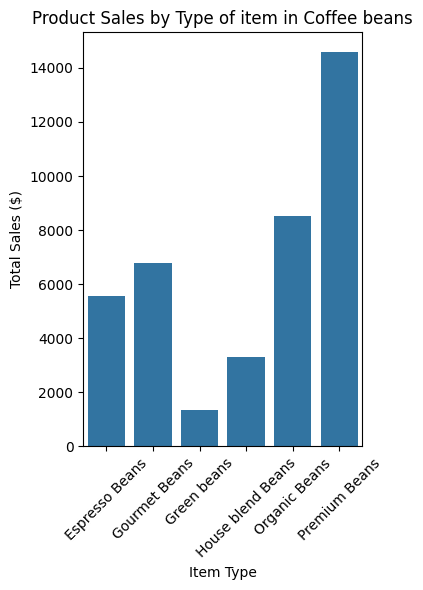

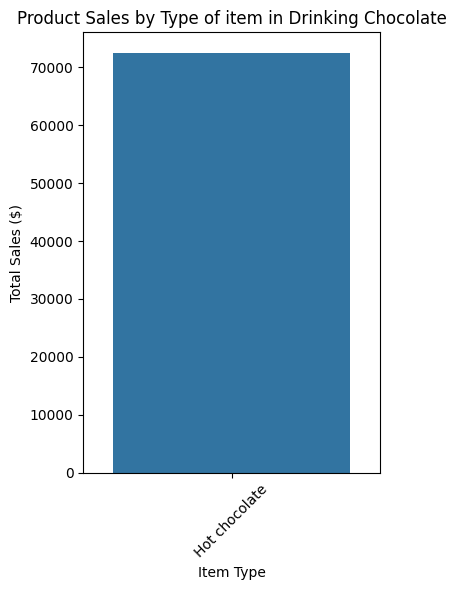

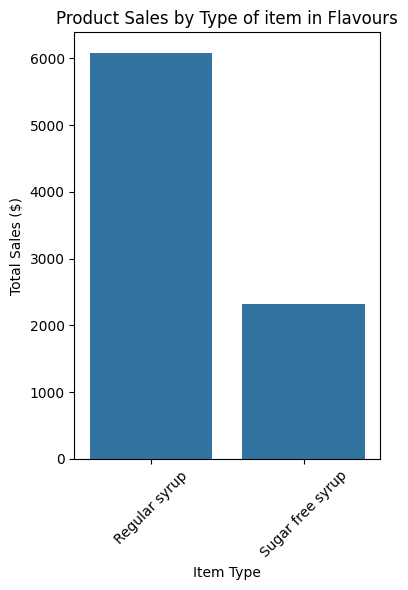

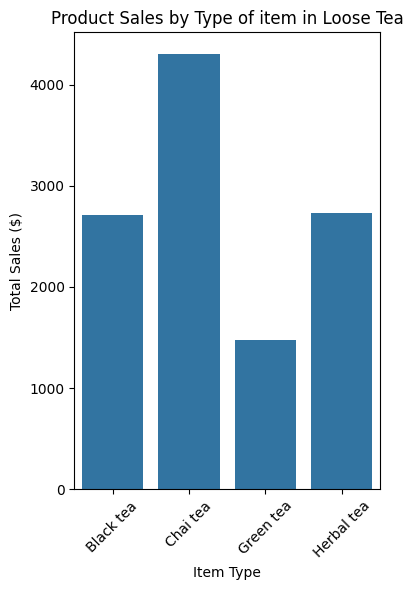

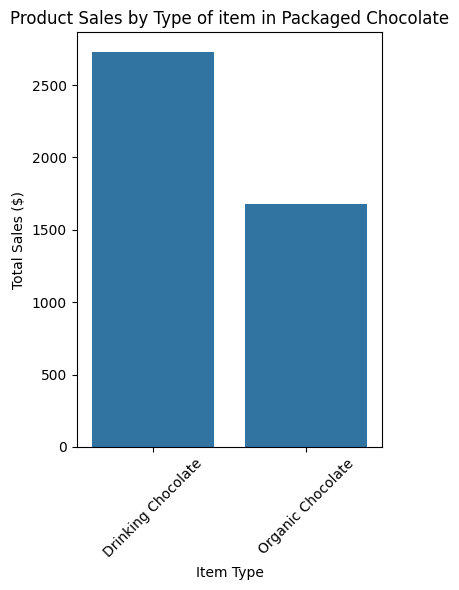

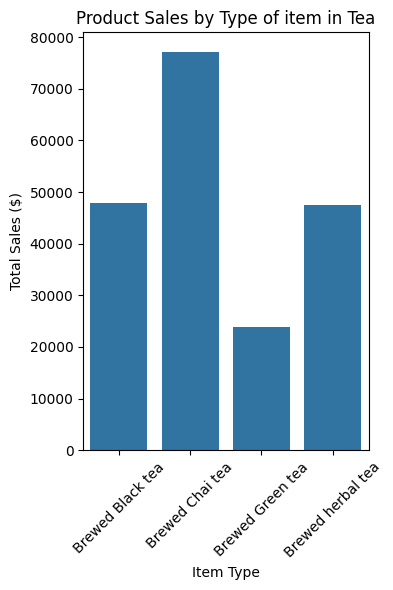

In [48]:
categoris = product_sales_df['product_category'].unique()

for category in categoris:

  plt.figure(figsize=(4,6))

  category_data = product_sales_df[product_sales_df['product_category'] == category]

  sns.barplot(data=category_data, x='product_type', y='sales')

  plt.title(f'Product Sales by Type of item in {category}')
  plt.xlabel('Item Type')
  plt.ylabel('Total Sales ($)')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

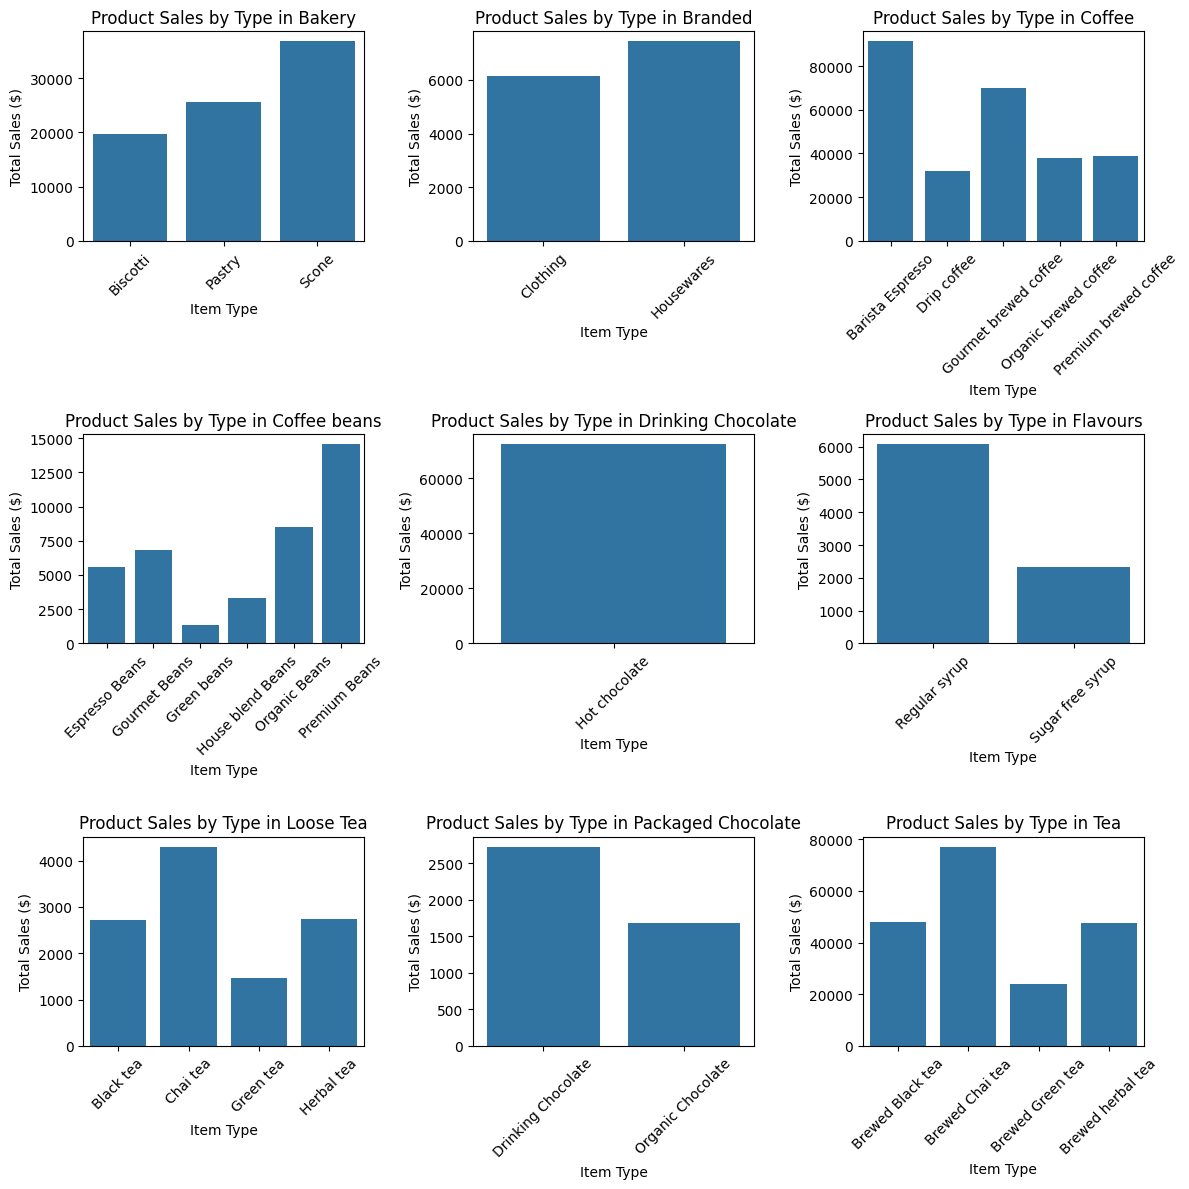

In [53]:
categories = product_sales_df['product_category'].unique()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through categories and plot each on a subplot
for idx, category in enumerate(categories):
    # Filter data for the current category
    category_data = product_sales_df[product_sales_df['product_category'] == category]

    # Create barplot on the corresponding subplot
    sns.barplot(data=category_data, x='product_type', y='sales', ax=axes[idx])

    # Set title and labels
    axes[idx].set_title(f'Product Sales by Type in {category}')
    axes[idx].set_xlabel('Item Type')
    axes[idx].set_ylabel('Total Sales ($)')
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()